In [1]:
#Importar librerías
import pandas as pd
import os
import zipfile
import shutil
import requests
import zipfile
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import geopandas as gpd
import folium
from branca.element import Template, MacroElement
from scipy.stats import randint

In [2]:
#Directorio de trabajo
try:
    os.chdir('C:/users/claud/Documents/GitHub/datavivi')
except:
    os.chdir('C:/users/claudio.pacheco/Documents/Github/datavivi')

os.getcwd()

'C:\\users\\claud\\Documents\\GitHub\\datavivi'

In [3]:
#Crear carpeta para descargar los datos
if not os.path.exists('datos'):
    os.makedirs('datos')

In [4]:
#Función para descargar y extraer archivos
def download_and_extract(url, filename, check_file_path, extract_path):
    # Checar si el archivo ya existe
    if os.path.isfile(check_file_path):
        print(f"El archivo {filename} existe, no se descargará.")
    else:
        print(f"El archivo {filename} no existe. Descargando.")
        response = requests.get(url)
        with open(filename, "wb") as code:
            code.write(response.content)
        if zipfile.is_zipfile(filename):
            # extraer zip
            with zipfile.ZipFile(filename, "r") as zip_ref:
                zip_ref.extractall(extract_path)
        
        # Eliminar zip
            os.remove(filename)
        else:
            print("El archivo descargado no es un zip. Proceso terminado.")

### Descarga de datos de vivienda a nivel manzana

In [27]:
#Url de los archivos
url_basica="https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/ageb_manzana/RESAGEBURB_"

In [28]:
#Ciclo para descargar y extraer los archivos
for entidad in range(1,33):
    if entidad<10:
        url=url_basica+"0"+str(entidad)+"_2020_csv.zip"
        filename="datos/conjunto_de_datos_ageb_urbana_"+"0"+str(entidad)+"_cpv2020.zip"
        check_file_path="datos/conjunto_de_datos_ageb_urbana_"+"0"+str(entidad)+"_cpv2020.csv"
        extract_path="datos"
        download_and_extract(url, filename, check_file_path, extract_path)
    else:
        url=url_basica+str(entidad)+"_2020_csv.zip"
        filename="datos/conjunto_de_datos_ageb_urbana_"+str(entidad)+"_cpv2020.zip"
        check_file_path="datos/conjunto_de_datos_ageb_urbana_"+str(entidad)+"_cpv2020.csv"
        extract_path="datos"
        download_and_extract(url, filename, check_file_path, extract_path)

El archivo datos/conjunto_de_datos_ageb_urbana_01_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_02_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_03_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_04_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_05_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_06_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_07_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_08_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_09_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_10_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_11_cpv2020.zip no existe. Descargando.
El archivo datos/conjunto_de_datos_ageb_urbana_12_cpv2

In [5]:
#Pegar todos los archivos csv en una sola data frame
df=pd.DataFrame()
for entidad in range(1,33):
    if entidad<10:
        df_temp=pd.read_csv("datos/RESAGEBURB_"+"0"+str(entidad)+"CSV20.csv",encoding='utf-8', low_memory=False)
    else:
        df_temp=pd.read_csv("datos/RESAGEBURB_"+str(entidad)+"CSV20.csv",encoding='utf-8', low_memory=False)
    df=pd.concat([df,df_temp],axis=0)
    print("Se ha agregado la entidad "+str(entidad)," a la dataframe")

#Imprimir el número de registros con separadores de miles
print("Se concluyó la concatenación. El conjunto de datos cuenta con "+str(df.shape[1])+" columnas y "+str("{:,}".format(df.shape[0]))+" registros")
df.columns=df.columns.str.lower() 

Se ha agregado la entidad 1  a la dataframe
Se ha agregado la entidad 2  a la dataframe
Se ha agregado la entidad 3  a la dataframe
Se ha agregado la entidad 4  a la dataframe
Se ha agregado la entidad 5  a la dataframe
Se ha agregado la entidad 6  a la dataframe
Se ha agregado la entidad 7  a la dataframe
Se ha agregado la entidad 8  a la dataframe
Se ha agregado la entidad 9  a la dataframe
Se ha agregado la entidad 10  a la dataframe
Se ha agregado la entidad 11  a la dataframe
Se ha agregado la entidad 12  a la dataframe
Se ha agregado la entidad 13  a la dataframe
Se ha agregado la entidad 14  a la dataframe
Se ha agregado la entidad 15  a la dataframe
Se ha agregado la entidad 16  a la dataframe
Se ha agregado la entidad 17  a la dataframe
Se ha agregado la entidad 18  a la dataframe
Se ha agregado la entidad 19  a la dataframe
Se ha agregado la entidad 20  a la dataframe
Se ha agregado la entidad 21  a la dataframe
Se ha agregado la entidad 22  a la dataframe
Se ha agregado la e

In [6]:
df_limpia=df.copy()
#Crear clave geoestadística
df_limpia['cvegeo'] = df_limpia['entidad'].astype(str).str.zfill(2) + df_limpia['mun'].astype(str).str.zfill(3) + df_limpia['loc'].astype(str).str.zfill(4) + df_limpia['ageb'].astype(str).str.zfill(4) + df_limpia['mza'].astype(str).str.zfill(3)
columnas = ['cvegeo'] + [col for col in df_limpia.columns if col != 'cvegeo']
df_limpia = df_limpia[columnas]
#Eliminar agregados de entidad. 
df_limpia=df_limpia[df_limpia['mun']!=0]
#Eliminar agregados de municipio. 
df_limpia=df_limpia[df_limpia['loc']!=0]
#Eliminar agregados de localidad.
df_limpia=df_limpia[df_limpia['ageb']!='0000']
#Eliminar agregados de manzana.
df_limpia=df_limpia[df_limpia['mza']!=0]
df_limpia.iloc[:,8:]=df_limpia.iloc[:,8:].apply(pd.to_numeric, errors='coerce')
df_limpia=df_limpia[df_limpia['tvivparhab']!=0]
df_limpia=df_limpia[df_limpia['tvivparhab'].notna()]
#Transformar nans a ceros
df_limpia=df_limpia.fillna(0)

df_limpia

,cvegeo,entidad,nom_ent,mun,nom_mun,loc,nom_loc,ageb,mza,pobtot,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic
4,0100100010017001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,1,170,...,0.0,53.0,13.0,33.0,5.0,5.0,0.0,0.0,36.0,0.0
5,0100100010017002,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,2,198,...,0.0,52.0,14.0,31.0,0.0,5.0,0.0,0.0,31.0,0.0
6,0100100010017003,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,3,198,...,0.0,53.0,14.0,30.0,5.0,5.0,4.0,0.0,35.0,0.0
7,0100100010017004,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,4,202,...,0.0,55.0,20.0,34.0,9.0,5.0,0.0,0.0,33.0,0.0
8,0100100010017005,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0017,5,157,...,0.0,45.0,21.0,24.0,5.0,6.0,0.0,3.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33828,3205800010123007,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,7,21,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
33831,3205800010123010,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,10,15,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33834,3205800010123013,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,13,40,...,0.0,11.0,0.0,8.0,0.0,0.0,0.0,0.0,9.0,0.0
33838,3205800010123017,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0123,17,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


### Descarga información del entorno urbano
Esta información servirá para identificar equipamiento en las manzanas.

In [10]:
#Agregar variables del entorno
url="https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/ceu/Censo2020_CEU_eum_csv.zip"
download_and_extract(url, "datos/Censo2020_CEU_eum_csv.zip", "datos/TI_MANZANA_EU_00.csv", "datos")

El archivo datos/Censo2020_CEU_eum_csv.zip no existe. Descargando.


In [7]:
entorno=pd.read_csv('datos/TI_MANZANA_EU_00.csv', encoding='latin-1')
#Columnas en minúsculas
entorno.columns=entorno.columns.str.lower()
#Construir la clave de manzana
entorno['cvegeo']=entorno["ent"].astype(str).str.zfill(2)+entorno["mun"].astype(str).str.zfill(3)+entorno["loc"].astype(str).str.zfill(4)+entorno["ageb"].astype(str).str.zfill(4)+entorno["mza"].astype(str).str.zfill(3)
entorno['vialidad_sinrec']=entorno['s_recu_n']/(entorno['totvial'])*100

#Dejar solo cvegeo y porcentajes
entorno=entorno[['cvegeo','vialidad_sinrec']]
#Sustituir Nan por 0
entorno=entorno.fillna(0)
entorno

,cvegeo,vialidad_sinrec
0,0100100010017001,0.0
1,0100100010017002,0.0
2,0100100010017003,0.0
3,0100100010017004,0.0
4,0100100010017005,0.0
...,...,...
1512862,3205800010123017,62.5
1512863,3205800010123018,100.0
1512864,3205800010123019,100.0
1512865,3205800010123020,100.0


In [8]:
#Pegar la información del entorno a la base de datos
df_limpia=pd.merge(df_limpia,entorno)

In [10]:
#Creación de indicadores
#Crear indicador de viviendas que no disponen de drenaje
df_limpia['p_viv_sndren']=df_limpia['vph_nodren']/df_limpia['tvivparhab']*100
#Crear indicador de viviendas que no disponen de agua entubada
df_limpia['p_viv_sagua']=df_limpia['vph_aguafv']/df_limpia['tvivparhab']*100
#Crear indicador de viviendas que no disponen de energía eléctrica
df_limpia['p_viv_senergia']=df_limpia['vph_s_elec']/df_limpia['tvivparhab']*100
#Dejar solo los indicadores y las primeras 7 columnas
df_limpia=df_limpia.iloc[:,0:7].join(df_limpia.iloc[:,-4:])
df_limpia

,cvegeo,entidad,nom_ent,mun,nom_mun,loc,nom_loc,vialidad_sinrec,p_viv_sndren,p_viv_sagua,p_viv_senergia
0,0100100010017001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0
1,0100100010017002,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0
2,0100100010017003,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0
3,0100100010017004,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0
4,0100100010017005,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1224778,3205800010123005,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0.0,0.0,0.0,0.0
1224779,3205800010123007,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0.0,0.0,0.0,0.0
1224780,3205800010123010,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,25.0,0.0,0.0,0.0
1224781,3205800010123013,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0.0,0.0,0.0,0.0


## Cálculo de componentes principales para crear índice

[0.88295944 0.06958368 0.04404914 0.00340774]


Text(0.5, -0.2, 'Fuente: Elaboración propia con datos de INEGI. Censo de Población y Vivienda 2020.')

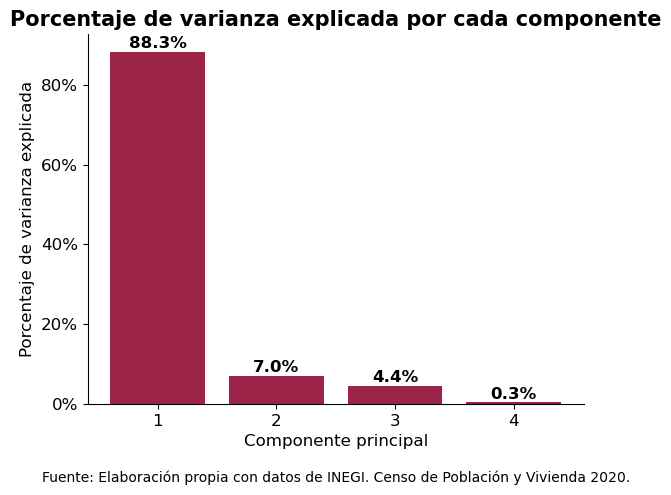

In [17]:
dato_pca = df_limpia[
    ['p_viv_sndren', 'p_viv_senergia', 'p_viv_sagua', 'vialidad_sinrec']]
#Crear objeto PCA
pca = PCA(n_components=4)
#Entrenar PCA
data = pca.fit_transform(dato_pca)
#Porcentaje de varianza explicada por cada componente
print(pca.explained_variance_ratio_)
#Gráfica de barras de varianza explicada
plt.bar(range(1, 5), pca.explained_variance_ratio_, color='#9d2449', align='center')
plt.title('Porcentaje de varianza explicada por cada componente', fontsize=15, fontweight='bold')
plt.xlabel('Componente principal')
plt.ylabel('Porcentaje de varianza explicada')
plt.xticks(range(1, 5))
#etiquetas en la parte superior de las barras
for x, y in zip(range(1, 5), pca.explained_variance_ratio_):
    plt.text(x, y + 0.01, str(round(y * 100, 1)) + '%', color='black', ha='center', fontweight='bold')
    #Eje y multiplicado por 100
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#Eliminar borde derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.text(0.5, -0.2, 'Fuente: Elaboración propia con datos de INEGI. Censo de Población y Vivienda 2020.', fontsize=10,
         ha='center', va='center', transform=plt.gca().transAxes)



In [23]:
#Crear índice con la primera componente principal
ind1=data[:,0]
explained_variance=pca.explained_variance_ratio_
indicador=ind1*explained_variance[0]

#Normalizar el indicador
indicador=(indicador-indicador.min())/(indicador.max()-indicador.min())
#Agregar el indicador a la base de datos
df_limpia['indicador']=indicador

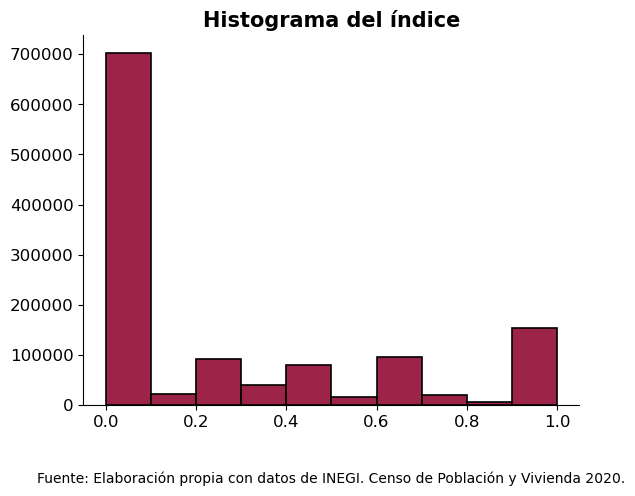

In [25]:
#Graficar el índice de rezago habitacional
plt.hist(indicador,bins=10,edgecolor='black', linewidth=1.2, color='#9d2449')
plt.title("Histograma del índice",fontsize=15, fontweight='bold')
#Evitar que eje y tenga notación científica
plt.ticklabel_format(style='plain', axis='y')
#Eliminar borde derecho y superior
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.text(0.5, -0.2, 'Fuente: Elaboración propia con datos de INEGI. Censo de Población y Vivienda 2020.', fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [26]:
df_limpia

,cvegeo,entidad,nom_ent,mun,nom_mun,loc,nom_loc,vialidad_sinrec,p_viv_sndren,p_viv_sagua,p_viv_senergia,indicador
0,0100100010017001,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0,7.811263e-12
1,0100100010017002,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0,0.000000e+00
2,0100100010017003,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0,3.576350e-12
3,0100100010017004,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0,3.203590e-12
4,0100100010017005,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,0.0,0.0,0.0,0.0,3.153833e-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1224778,3205800010123005,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0.0,0.0,0.0,0.0,3.153833e-12
1224779,3205800010123007,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0.0,0.0,0.0,0.0,3.153833e-12
1224780,3205800010123010,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,25.0,0.0,0.0,0.0,2.269186e-01
1224781,3205800010123013,32,Zacatecas,58,Santa María de la Paz,1,Santa María de la Paz,0.0,0.0,0.0,0.0,3.153833e-12


In [ ]:
#Crear mapa de folium con el índice


